In [100]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 1D Cellular Automata

In [86]:
def rulegen(num, r=1):
    states = [tuple([int(d) for d in f"{bin(i)[2:]:0>3}"]) for i in reversed(range(2**(2*r+1)))]
    rule = [int(d) for d in f"{bin(num)[2:]:0>{(2**(2*r+1))}}"]
    return {s:d for s,d in zip(states, rule)}
    return dic

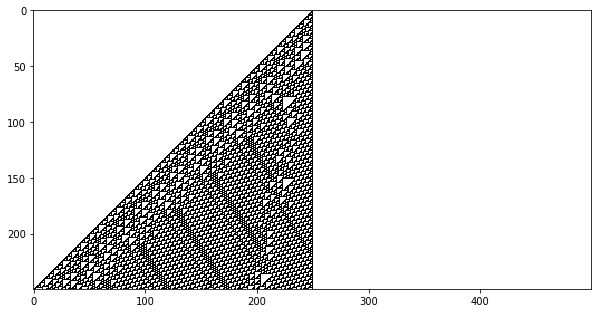

In [87]:
R = 110
N = 500
F = rulegen(R)

M = np.zeros((N//2,N))
M[0,N//2] = 1
# M[0] = np.random.random(size=N).round(0)

for rowi in range(0,(N//2)-1):
    for coli in range(0,N):
        M[rowi+1, (coli+1)%N] = F[
            M[rowi,(coli)%N],
            M[rowi,(coli+1)%N],
            M[rowi,(coli+2)%N],
        ]

plt.figure(figsize=(10,10))
plt.imshow(M, interpolation="none", cmap="Greys")
plt.show()

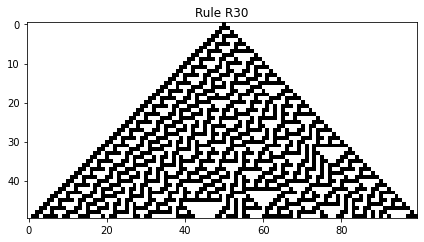

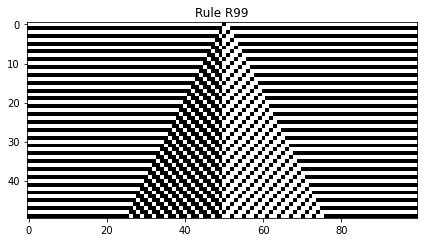

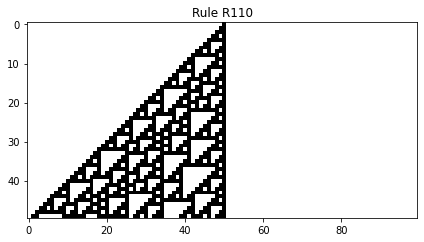

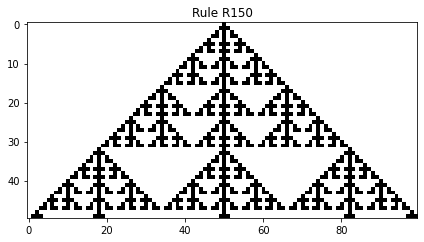

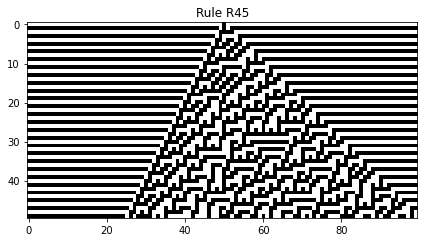

In [89]:
N = 100

for R in [30,99,110,150,45]:
# for R in np.random.randint(0,255,size=20):
# for R in range(256):
    F = rulegen(R)
    M = np.zeros((N//2,N))
    M[0,N//2] = 1
    for rowi in range(0,(N//2)-1):
        for coli in range(0,N):
            M[rowi+1, (coli+1)%N] = F[
                M[rowi,(coli)%N],
                M[rowi,(coli+1)%N],
                M[rowi,(coli+2)%N],
            ]

    plt.figure(figsize=(7,7))
    plt.title(f"Rule R{R}")
    plt.imshow(M, interpolation="none", cmap="Greys")
    # vmin, vmax = sorted(np.random.random(size=2)*3-1)
    # vmin = min(vmin, 0)
    # vmax = max(vmax, 1)
    # plt.imshow(M, interpolation="none", cmap="turbo",
    #     vmin=vmin, vmax=vmax)
    plt.show()

# Game of Life

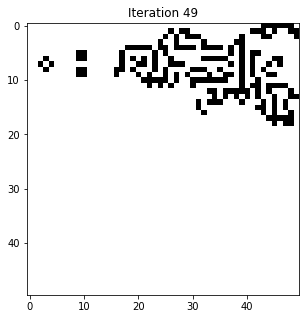

In [122]:
N = 50
W = np.zeros((N,N))
W[1:8, 1:38] = 1

def update(W, i,j):
    neighbours = W[max(i-1,0):min(i+2,N), max(j-1,0):min(j+2,N)].flatten()
    count = sum(neighbours) - W[i,j]
    # print(count)
    if count < 2: W[i,j] = 0
    elif count == 3: W[i,j] = 1
    elif count > 3: W[i,j] = 0

prev = np.ones_like(W)
for t in range(50):
    if np.allclose(prev, W): break
    prev = W.copy()
    for i in range(N):
        for j in range(N):
            update(W, i, j)
    plt.figure(figsize=(5,5))
    plt.title(f"Iteration {t}")
    plt.imshow(W, interpolation="none", cmap="Greys")   
    plt.show()
    clear_output(wait=True)

# Logistic Map

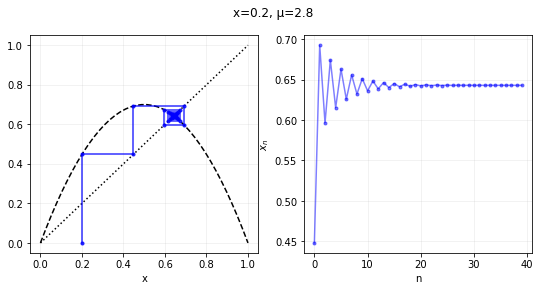

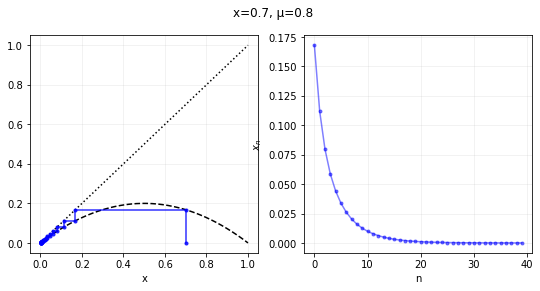

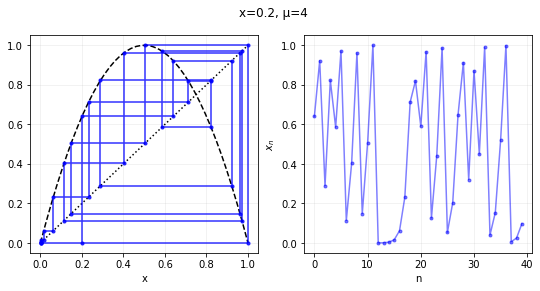

In [209]:
f = lambda x, mu: mu*x*(1-x)
N = 40

for mu, x0 in [
    (2.8, 0.2),
    (0.8, 0.7),
    (4, 0.2),
]:
    x = x0
    X = np.linspace(0,1,N)
    FX = f(X, mu)
    Y = np.zeros(N)
    for i in range(N):
        x = f(x, mu)
        Y[i] = x

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

    ax1.plot(X, FX, color="black", linestyle="--", label="y = logisticmap(x)")
    ax1.plot(X, X, color="black", linestyle=":", label="y = x")
    # ax1.plot(Y, np.roll(Y, -1), ".-")
    ax1.grid(alpha=0.2)
    # ax1.legend()

    # Code to generate cobweb plot
    # is a bit more complicated because we want to plot straight lines between points
    # so for each x and y point we have to specify another x and y just to get a straight line
    # generate 2 arrays with (N+1) rows and 2 columns
    px, py = np.zeros((2,N+1,2))
    px[0], py[0] = x0, 0
    for i in range(1, N, 2):
        px[i] = px[i-1]  # x is the previous x
        py[i] = f(px[i-1], mu)  # y is f(previous x)
        px[i+1] = py[i]  # next x is current y
        py[i+1] = py[i]  # next y is current y

    # Plot the path traced out by the iteration.
    ax1.plot(px, py, ".-", color="blue", alpha=0.5)

    ax1.set_xlabel("x")
    ax2.set_xlabel("n")
    ax2.set_ylabel("$x_n$")

    ax2.plot(Y, ".-", color="blue", alpha=0.5)
    ax2.grid(alpha=0.2)
    fig.suptitle(f"x={x0}, μ={mu}")
    plt.show()

# Perculations

In [ ]:
N = 20
p = 0.40
L = np.random.random(size=(N,N))
L = np.where(L>p, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax1.imshow(L, interpolation="none", cmap="Greys")

# TODO: below algorithm is wrong, need recursive / tree based algorithm
# for i in range(N):
#     for j in range(N):
#         if i == N-1 or j == N-1 or i == 0 or j == 0 or L[i,j] == 0:
#                 continue
#         else:
#             L[i,j] = max(
#                 L[i+1,j],
#                 L[i,j+1],
#                 L[i-1,j],
#                 L[i,j-1],
#             )
#             L[i,j] += (
#                 int(L[i+1,j]>0) + int(L[i-1,j]>0) + 
#                 int(L[i,j+1]>0) + int(L[i,j-1]>0)
# #             )
#             if L[i+1,j] != 0: L[i+1,j] = L[i,j]
#             if L[i,j+1] != 0: L[i,j+1] = L[i,j]
#             if L[i-1,j] != 0: L[i-1,j] = L[i,j]
#             if L[i,j-1] != 0: L[i,j-1] = L[i,j]

todo = set([(i,j) for i in range(N) for j in range(N)])
done = set([])
while todo:
    (i,j) = todo.pop()
    if i == N or j == N or i == -1 or j == -1 or L[i,j] == 0:
        done.add((i,j))
        continue
    else:
        maxn = L[i,j]
        if i+1 != N: maxn = max(L[i,j], L[i+1,j])
        if i-1 != -1: maxn = max(L[i,j], L[i-1,j])
        if j+1 != N: maxn = max(L[i,j], L[i,j+1])
        if j-1 != -1: maxn = max(L[i,j], L[i,j-1])
        if L[i,j] == 1:
            L[i,j] = maxn + 1
        elif L[i,j] > 1 and L[i,j] < maxn:
            L[i,j] = maxn
        elif L[i,j] == maxn:
            # done.add((i,j))

        neighbours = {(i+1,j), (i,j+1), (i-1,j), (i,j-1)}
        todo = todo | neighbours  # add neighbours to todo
        todo = todo - done  # remove dones from todo


ax2.imshow(L, interpolation="none", cmap="Greys")

x, y = np.unravel_index(np.argmax(L), shape=L.shape)
maxx = np.max(L) + 1
L[x,y] = maxx

todo = set([(x,y)])
done = set([])

while todo:
    (i,j) = todo.pop()
    done.add((i,j))
    if i == N or j == N or i == -1 or j == -1 or L[i,j] == 0:
        continue
    else:
        L[i,j] = maxx
        neighbours = {(i+1,j), (i,j+1), (i-1,j), (i,j-1)}
        todo = todo | neighbours  # add neighbours to todo
        todo = todo - done  # remove dones from todo

L = np.where((L>0) & (L<maxx), 1, L)
L = np.where((L==maxx), 4, L)

ax3.imshow(L, interpolation="none", cmap="Greys")
plt.show()